<a href="https://colab.research.google.com/github/verneh/transformers/blob/main/zeroshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing zeroshot with openai clip.

In [1]:
# clone repo.
!pip install git+https://github.com/PrithivirajDamodaran/ZSIC.git

  Cloning https://github.com/PrithivirajDamodaran/ZSIC.git to /tmp/pip-req-build-_jfcg5xk
  Running command git clone -q https://github.com/PrithivirajDamodaran/ZSIC.git /tmp/pip-req-build-_jfcg5xk
  Created wheel for ZSIC: filename=ZSIC-1.0-py3-none-any.whl size=4759 sha256=200a37b50e756e711f41bc4bf028ce9379362c8338a3c4361ff3260ef9d3805c
  Stored in directory: /tmp/pip-ephem-wheel-cache-f93fzhpk/wheels/0e/72/6f/9b5c66bb0425fa466fc3ba15bb13900763655bef051267d458
Successfully built ZSIC


In [25]:
# Initialize Vit Transformer backbone with multilingual language set to French.
from ZSIC import ZeroShotImageClassification

zsic = ZeroShotImageClassification(lang="fr")

Loading sentence transformer model clip-ViT-B-32 ...


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/371 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Label language fr ...


In [32]:
# Grab image from the internet.
!wget "https://www.lbtechreviews.com/wp-content/uploads/2021/10/Xiaomi11TPro_TOP.jpg"

--2022-03-04 09:09:19--  https://www.lbtechreviews.com/wp-content/uploads/2021/10/Xiaomi11TPro_TOP.jpg
Resolving www.lbtechreviews.com (www.lbtechreviews.com)... 185.181.62.136, 2a03:94e0:ffff:185:181:62:0:136
Connecting to www.lbtechreviews.com (www.lbtechreviews.com)|185.181.62.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 415976 (406K) [image/jpeg]
Saving to: ‘Xiaomi11TPro_TOP.jpg’

Xiaomi11TPro_TOP.jp 100%[===================>] 406.23K   743KB/s    in 0.5s    

2022-03-04 09:09:20 (743 KB/s) - ‘Xiaomi11TPro_TOP.jpg’ saved [415976/415976]



In [33]:
# Store local image in variable.
input_image = "/content/Xiaomi11TPro_TOP.jpg"

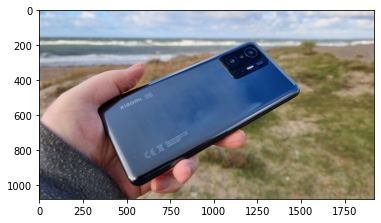

In [35]:
# display image through opencv.
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(input_image)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

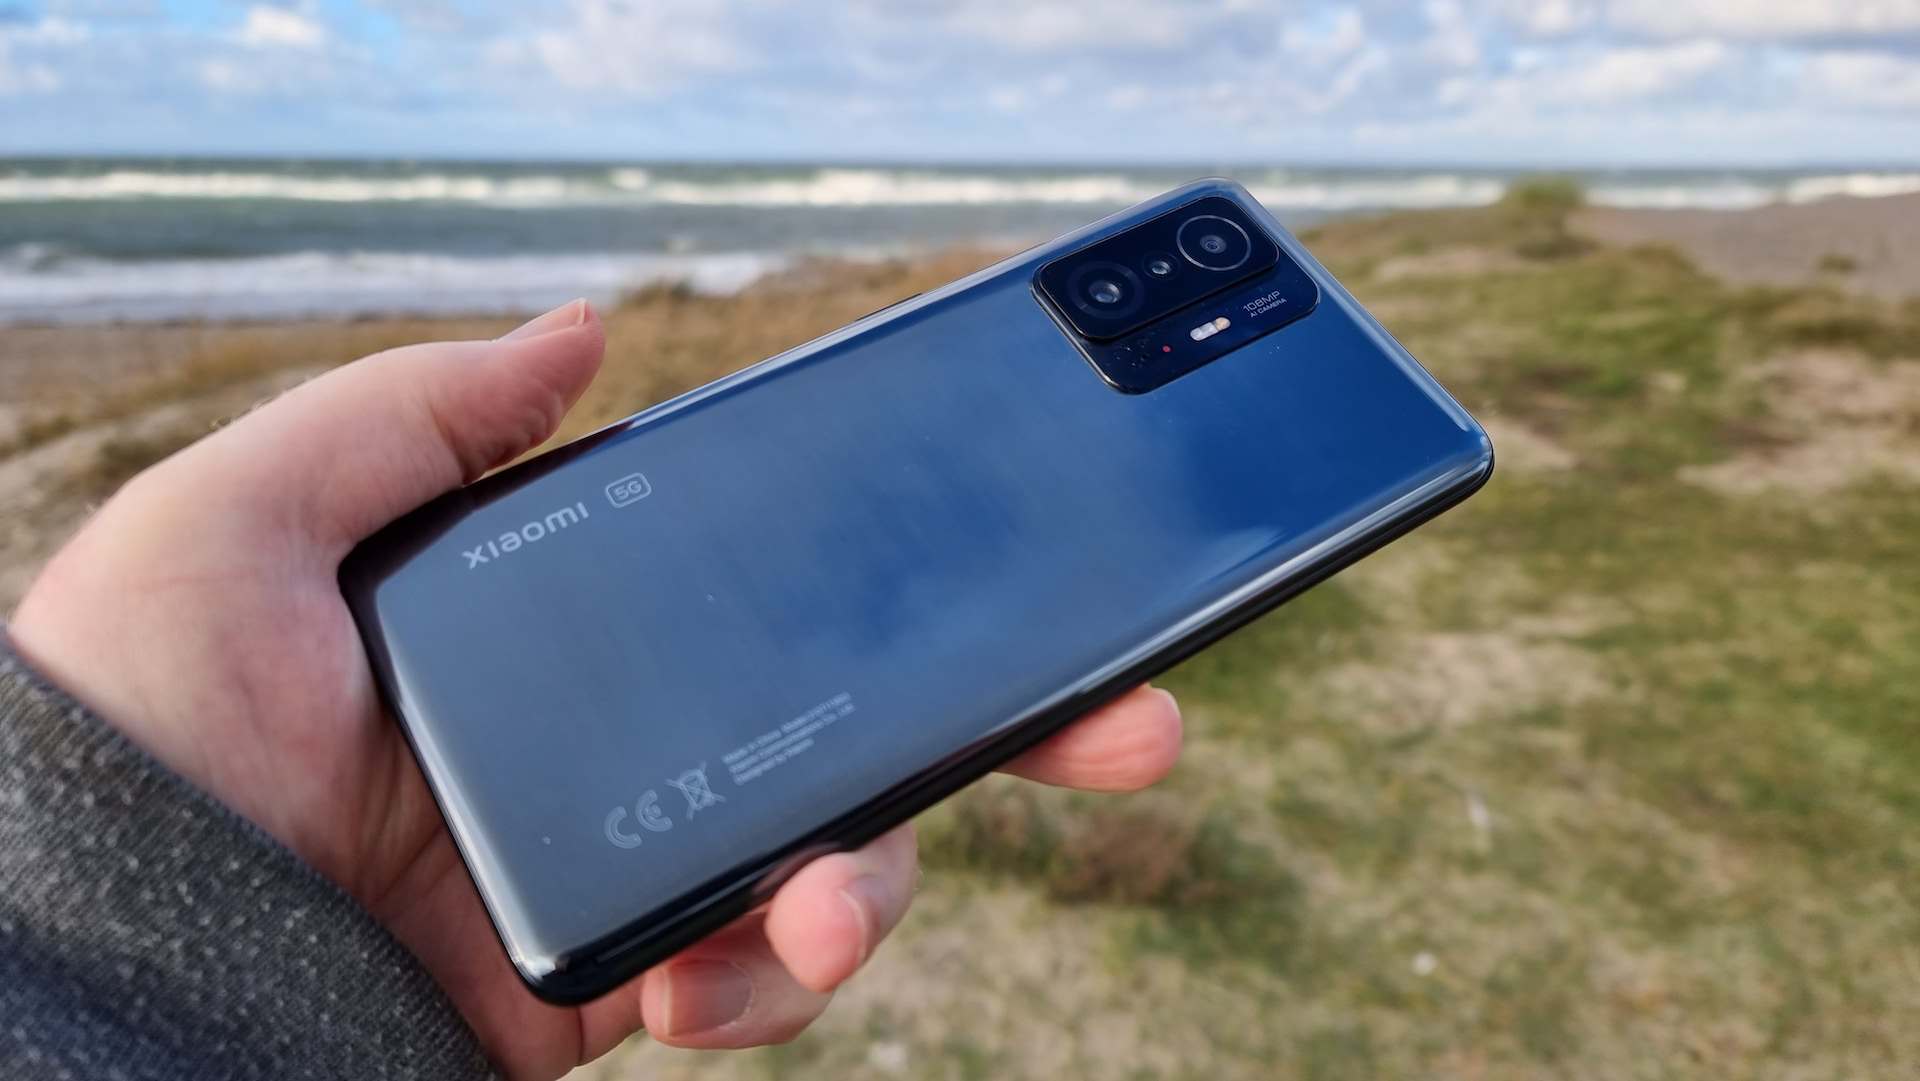

In [43]:
# display image with pil package.
from PIL import Image
 
# creating a object and displaying it.
im = Image.open(input_image)
im

In [44]:
# prediction.
# can't input opencv directly. needs to be PIL.

preds = zsic(image=im,
            candidate_labels=["meilleur téléphone portable", "écran tactile", "console de jeu","innovation numérique"], 
            )
print(preds)

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1081 at 0x7F8AF30BF1D0>, 'scores': [0.913288, 0.028145015, 0.0019996315, 0.056567308], 'labels': ['meilleur téléphone portable', 'écran tactile', 'console de jeu', 'innovation numérique']}
